In [2]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK resources (if not already downloaded)
nltk.download('stopwords')

# Load your dataset
df = pd.read_csv(r'c:/Users/prajw/Documents/infosys_internship/dataset-tickets-multi-lang3-4k.csv')

# Step 1: Handle Missing Values
df.fillna('', inplace=True)  # Fill missing values with empty strings

# Step 2: Text Cleaning Function
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()

# Apply text cleaning to 'subject' and 'body'
df['subject'] = df['subject'].apply(clean_text)
df['body'] = df['body'].apply(clean_text)

# Step 3: Lowercasing
df['subject'] = df['subject'].str.lower()
df['body'] = df['body'].str.lower()

# Step 4: Tokenization (optional, if needed)
# This can be done later during vectorization

# Step 5: Removing Stop Words
stop_words = set(stopwords.words('english'))
df['subject'] = df['subject'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
df['body'] = df['body'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Step 6: Stemming (optional)
stemmer = PorterStemmer()
df['subject'] = df['subject'].apply(lambda x: ' '.join(stemmer.stem(word) for word in x.split()))
df['body'] = df['body'].apply(lambda x: ' '.join(stemmer.stem(word) for word in x.split()))

# Step 7: Combine Text for Vectorization
df['text_combined'] = df['subject'] + ' ' + df['body']

# Step 8: Vectorization (using TF-IDF)
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['text_combined'])

# Now X is ready for use in machine learning models

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prajw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
import pandas as pd

# Load your dataset (ensure this matches your actual dataset path)
df = pd.read_csv('c:/Users/prajw/Documents/infosys_internship/dataset-tickets-multi-lang3-4k.csv')

# Assuming the column with issues is named 'issue_class' or similar
# Replace 'issue_class' with the actual column name containing the issues
issue_counts = df['queue'].value_counts()

# Display the counts of each unique issue
print("Issue Counts:")
print(issue_counts)

# Calculate the threshold for 3% of total tickets
total_tickets = len(df)
threshold = total_tickets * 0.03

# Filter issues that occur at least 3% of the total tickets
frequent_issues = issue_counts[issue_counts >= threshold]

# Display the frequent issues
print("\nFrequent Issues (occurring at least 3% of total tickets):")
print(frequent_issues)

Issue Counts:
Technical Support                  1317
Product Support                     690
Customer Service                    627
IT Support                          445
Billing and Payments                338
Returns and Exchanges               197
Service Outages and Maintenance     141
Sales and Pre-Sales                 137
General Inquiry                      55
Human Resources                      53
Name: queue, dtype: int64

Frequent Issues (occurring at least 3% of total tickets):
Technical Support                  1317
Product Support                     690
Customer Service                    627
IT Support                          445
Billing and Payments                338
Returns and Exchanges               197
Service Outages and Maintenance     141
Sales and Pre-Sales                 137
Name: queue, dtype: int64


C:\Users\prajw\AppData\Local\Temp\ipykernel_33820\896595486.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=issue_counts.index, y=issue_counts.values, palette='viridis')


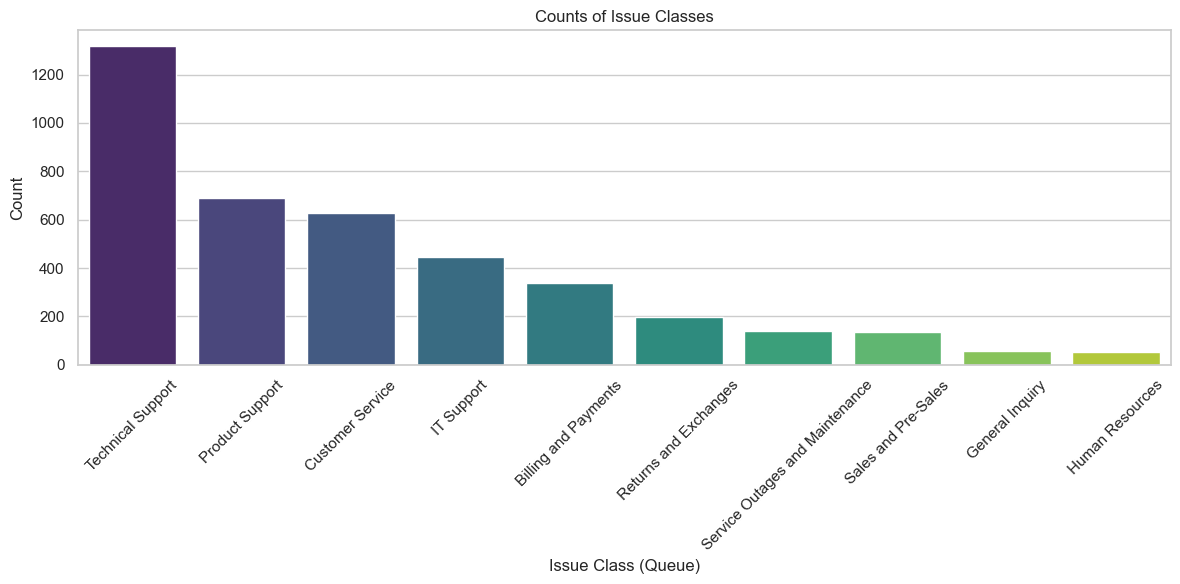

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plotting the issue counts
plt.figure(figsize=(12, 6))
sns.barplot(x=issue_counts.index, y=issue_counts.values, palette='viridis')
plt.title('Counts of Issue Classes')
plt.xlabel('Issue Class (Queue)')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
# Display details for frequent issues
for issue in frequent_issues.index:
    print(f"\nDetails for {issue}:")
    issue_details = df[df['queue'] == issue]
    print(issue_details[['subject', 'body', 'priority', 'language']].head(10))  # Adjust columns as needed



Details for Technical Support:
                                              subject  \
0   Problema crítico del servidor requiere atenció...   
2   Erro na Autocompletação de Código do IntelliJ ...   
5      Urgent: Issue with Zoom Screen Sharing Feature   
10  Request for software development consultation ...   
12                       Urgent AWS Deployment Issues   
13  Solicitud urgente de orientación y solución de...   
17  Hilfestellung für die Integration von Google W...   
19               Assistance Needed for Chrome Crashes   
21                                                NaN   
22                                                NaN   

                                                 body priority language  
0   Es necesaria una investigación inmediata sobre...     high       es  
2   Prezado Suporte ao Cliente <name>,\n\nEstou es...     high       pt  
5   Dear Customer Support,\n\nI am experiencing a ...     high       en  
10  Dear Customer Support,\n\nI hope this me

In [9]:
def generate_response(customer_name, product, steps, support_team):
    # Define the template
    template = """
    Dear {customer_name},

    Thank you for reaching out regarding your issue with {product}. We understand how important this matter is and appreciate your patience as we work towards a resolution.

    To assist you better, please try the following steps:
    1. {step_1}
    2. {step_2}
    3. {step_3}

    If the issue persists, please provide us with any additional details or error messages you may have encountered. We are committed to resolving this matter quickly.

    Best regards,
    {support_team}
    """
    
    # Fill in the template with actual values
    response = template.format(
        customer_name=customer_name,
        product=product,
        step_1=steps[0],
        step_2=steps[1],
        step_3=steps[2],
        support_team=support_team
    )
    
    return response

# Example usage
customer_name = "John Doe"
product = "Microsoft Surface Pro 7"
steps = [
    "Ensure that your device is running the latest software updates.",
    "Try adjusting your display settings.",
    "Boot your device in Safe Mode to check for third-party app conflicts."
]
support_team = "Tech Online Store Support Team"

response_email = generate_response(customer_name, product, steps, support_team)
print(response_email)



    Dear John Doe,

    Thank you for reaching out regarding your issue with Microsoft Surface Pro 7. We understand how important this matter is and appreciate your patience as we work towards a resolution.

    To assist you better, please try the following steps:
    1. Ensure that your device is running the latest software updates.
    2. Try adjusting your display settings.
    3. Boot your device in Safe Mode to check for third-party app conflicts.

    If the issue persists, please provide us with any additional details or error messages you may have encountered. We are committed to resolving this matter quickly.

    Best regards,
    Tech Online Store Support Team
    


In [10]:
import pandas as pd

# Load the dataset
file_path = 'c:/Users/prajw/Documents/infosys_internship/dataset-tickets-multi-lang3-4k.csv'
df = pd.read_csv(file_path)

# Identify the most common issue class (queue)
issue_counts = df['queue'].value_counts()
most_common_issue = issue_counts.idxmax()  # Get the most common issue class

# Define a template response based on the most common issue
def generate_response(issue_class):
    if issue_class == "Technical Support":
        response = f"""
        Dear Customer,

        Thank you for reaching out regarding your {issue_class} issue. We understand how critical it is to resolve this matter promptly.

        To assist you better, please try the following troubleshooting steps:

        1. Ensure that your device is running the latest software updates.
        2. Check your network connection to ensure it is stable and functioning properly.
        3. If applicable, restart your device to refresh the system.

        If the problem persists after trying these steps, please provide us with any additional details or error messages you may have encountered. This information will help us diagnose the issue more effectively.

        We appreciate your patience and cooperation as we work towards a resolution.

        Best regards,
        Technical Support Team
        """
    else:
        response = f"""
        Dear Customer,

        Thank you for reaching out regarding your {issue_class} issue. We are here to assist you.

        Please provide us with more details about your concern so we can help you effectively.

        Best regards,
        Customer Support Team
        """
    
    return response

# Generate and print the response for the most common issue
response_email = generate_response(most_common_issue)
print(response_email)



        Dear Customer,

        Thank you for reaching out regarding your Technical Support issue. We understand how critical it is to resolve this matter promptly.

        To assist you better, please try the following troubleshooting steps:

        1. Ensure that your device is running the latest software updates.
        2. Check your network connection to ensure it is stable and functioning properly.
        3. If applicable, restart your device to refresh the system.

        If the problem persists after trying these steps, please provide us with any additional details or error messages you may have encountered. This information will help us diagnose the issue more effectively.

        We appreciate your patience and cooperation as we work towards a resolution.

        Best regards,
        Technical Support Team
        
